## 创建测试集

In [37]:
import pandas as pd
import os

HOUSING_PATH=os.path.join("datasets","housing")

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv");
    return pd.read_csv(csv_path)

housing=load_housing_data()

### 方法一：通过随机数列划分训练集和测试集,将随机数列作为列索引划分
    np.random.permutation #生成随机数列

In [15]:
import numpy as np
np.random.seed(42)

In [4]:
def split_train_test(data,test_ration):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ration)
    test_indices=shuffled_indices[:test_set_size]
    tran_indices=shuffled_indices[test_set_size:]
    tran_set=data.iloc[tran_indices]
    test_set=data.iloc[test_indices]
    return tran_set,test_set

In [5]:
train_set,test_set=split_train_test(housing,0.2)

### 方法二：通过计算主键的hash值，只取hash值的

    使用pd.apply方法

In [1]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

### 方法三：通过Scikit-Learn 提供的函数划分

In [2]:
from sklearn.model_selection import train_test_split

train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

## 分层抽样划分测试集

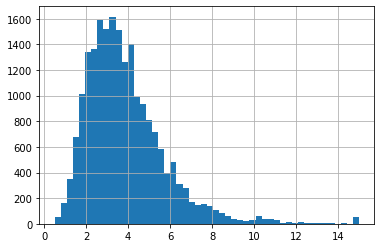

In [13]:
import matplotlib.pyplot as plt
housing['median_income'].hist(bins=50)
plt.show()

In [52]:
# 限制收入类别的数量
housing['income_cat']=np.ceil(housing['median_income']/1.5)

#将所有大于5的类别合并为类别5
housing['income_cat'].where(housing['income_cat']<5,5.0,inplace=True)

housing['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

### 收入划分层级

In [78]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [80]:
housing["income_cat"].value_counts().sort_index()

1     822
2    6581
3    7236
4    3639
5    2362
Name: income_cat, dtype: int64

### 使用Stratified-Shuffle Split 类进行分层抽样

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]